# Web Scraping using Python

## Import Libraries

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [5]:
# Request the webpage and get the text
urlreq = requests.get('https://en.wikipedia.org/wiki/Comparison_of_North_American_ski_resorts')

# Extract the text from the requested webpage
url = urlreq.text

# Create a parse tree with BS using the html parser
soup = BeautifulSoup(url, 'html.parser')

In [6]:
# Transforming html table into a dataframe
dfs = pd.read_html(url)
df = dfs[4]

In [7]:
df.head()

,Resort name and website,Nearest city,State/province,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Skiable acreage,Total trails,Total lifts,Avg annual snowfall (in),Adult weekend lift ticket window price (USD),Date statistics updated
0,Ski Bromont,Bromont,Quebec,1854,590.0,1264.0,450,141.0,9.0,190,$54,"December 1, 2019[1]"
1,Apex Mountain Resort,Penticton,British Columbia,7197,5197.0,2000.0,1112,79.0,4.0,236,$65,"November 30, 2019[2]"
2,Canyon Ski Area,Red Deer,Alberta,2950,2412.0,538.0,80,23.0,6.0,45,$35,"November 30, 2019[3]"
3,Fernie Alpine Resort,Fernie,British Columbia,7000,3450.0,3550.0,2500,142.0,10.0,360,$90,"November 30, 2019[4]"
4,Marble Mountain Ski Resort,Steady Brook,Newfoundland and Labrador,1791,33.0,1759.0,230,40.0,5.0,192,$34,"December 1, 2019[5]"


## Data Cleaning and Manipulation

Web scraping was used to collect information from Wikipedia which was then transformed into a dataframe. However, this dataset is not available in the most useful format as is and must be cleaned before any analysis can be performed.  
Such a scenario is expected to occur as the web pages aren't always designed to make extracting data easy.

In [8]:
# Rename columns
df.rename(columns = {'Resort name and website':'Resort', 'Nearest city':'City', 'State/province':'State', 'Adult weekend lift ticket window price (USD)':'Lift ticket (USD)'}, inplace=True)
# Drop columns that are not necessary 
df = df.drop(['Date statistics updated'], axis=1)

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Check for missing values
df.isna().sum().sort_values(ascending=False)

Avg annual snowfall (in)    69
Skiable acreage             33
Peak elevation (ft)         23
Base elevation (ft)         23
Total trails                20
Total lifts                 11
Lift ticket (USD)           10
Vertical drop (ft)           5
City                         2
Resort                       0
State                        0
dtype: int64

In [11]:
# Check datatypes of columns
df.dtypes

Resort                       object
City                         object
State                        object
Peak elevation (ft)          object
Base elevation (ft)         float64
Vertical drop (ft)          float64
Skiable acreage              object
Total trails                float64
Total lifts                 float64
Avg annual snowfall (in)     object
Lift ticket (USD)            object
dtype: object

In [12]:
# Exclude rows with missing values from 'City' column 
df = df[df['City'].notna()]
# Replace missing values in base elevation, total trails, total lifts, and vertical drop columns with mean of their respective column
df['Base elevation (ft)'].fillna(value=df['Base elevation (ft)'].mean(), inplace=True)
df['Vertical drop (ft)'].fillna(value=df['Vertical drop (ft)'].mean(), inplace=True)
df['Total trails'].fillna(value=df['Total trails'].mean(), inplace=True)
df['Total lifts'].fillna(value=df['Total lifts'].mean(), inplace=True)
# Change datatypes to 'int' to remove decimals and for further analysis
convert_dict = {'Base elevation (ft)': int, 'Total trails': int, 'Total lifts': int, 'Vertical drop (ft)': int}
df = df.astype(convert_dict)

In [13]:
# Removing special characters from 'Lift ticket' column and replacing missing values with mean
df['Lift ticket (USD)'] = df['Lift ticket (USD)'].str.replace('$', '', regex=True)
df['Lift ticket (USD)'] = df['Lift ticket (USD)'].fillna(-1)
df['Lift ticket (USD)'] = df['Lift ticket (USD)'].astype(str)
replacers = {'-1':float('nan'), 'Private Club':float('nan'), 'Free':float('nan'), 'Temporarily Closed':float('nan'), '25/season':float('nan'), '84.95[70]':float('84.95'), 'Closed Temporarily':float('nan')}
df['Lift ticket (USD)'] = df['Lift ticket (USD)'].replace(replacers)
df['Lift ticket (USD)'] = df['Lift ticket (USD)'].astype(float)
df['Lift ticket (USD)'].fillna(value=df['Lift ticket (USD)'].mean(), inplace=True)
# Change datatype to 'int' to remove decimals and for further analysis
df['Lift ticket (USD)'] = df['Lift ticket (USD)'].astype(int)

In [14]:
# Removing special characters from 'Avg annual snowfall' column and replacing missing values with mean
replacers1 = {'220[21]':float('220'), '80[58]':float('80'), '132[63]':float('132'), '180[69]':float('180'), '100[87]':float('100'), '120[89]':float('120'), '168[100]':float('168'), '8,464[102]':float('8464'), '311`':float('311'), '9,422[102]':float('9422')}
df['Avg annual snowfall (in)'] = df['Avg annual snowfall (in)'].replace(replacers1)
df['Avg annual snowfall (in)'] = df['Avg annual snowfall (in)'].astype(float)
df['Avg annual snowfall (in)'].fillna(value=df['Avg annual snowfall (in)'].mean(), inplace=True)
# Change datatype to 'int' to remove decimals and for further analysis
df['Avg annual snowfall (in)'] = df['Avg annual snowfall (in)'].astype(int)

In [15]:
# Removing special characters from 'Skiable acreage' column and replacing missing values with mean
df['Skiable acreage'] = df['Skiable acreage'].replace(replacers1)
df['Skiable acreage'] = df['Skiable acreage'].astype(float)
df['Skiable acreage'].fillna(value=df['Skiable acreage'].mean(), inplace=True)
# Change datatype to 'int' to remove decimals and for further analysis
df['Skiable acreage'] = df['Skiable acreage'].astype(int)

In [16]:
# Removing special characters from 'Peak elevation' column and replacing missing values with mean
df['Peak elevation (ft)'] = df['Peak elevation (ft)'].replace(replacers1)
df['Peak elevation (ft)'] = df['Peak elevation (ft)'].astype(float)
df['Peak elevation (ft)'].fillna(value=df['Peak elevation (ft)'].mean(), inplace=True)
# Change datatype to 'int' to remove decimals and for further analysis
df['Peak elevation (ft)'] = df['Peak elevation (ft)'].astype(int)                                         

In [17]:
# Confirming that all missing values are replaced
df.isna().sum().sort_values(ascending=False)
# 'Resort', 'City', and 'State' columns contain a few rows with special characters '[]' however since they are str datatypes I will continue on with the analysis from here

Resort                      0
City                        0
State                       0
Peak elevation (ft)         0
Base elevation (ft)         0
Vertical drop (ft)          0
Skiable acreage             0
Total trails                0
Total lifts                 0
Avg annual snowfall (in)    0
Lift ticket (USD)           0
dtype: int64

## Data Visualizations

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Distribution Charts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0014d23d0>,
      dtype=object)

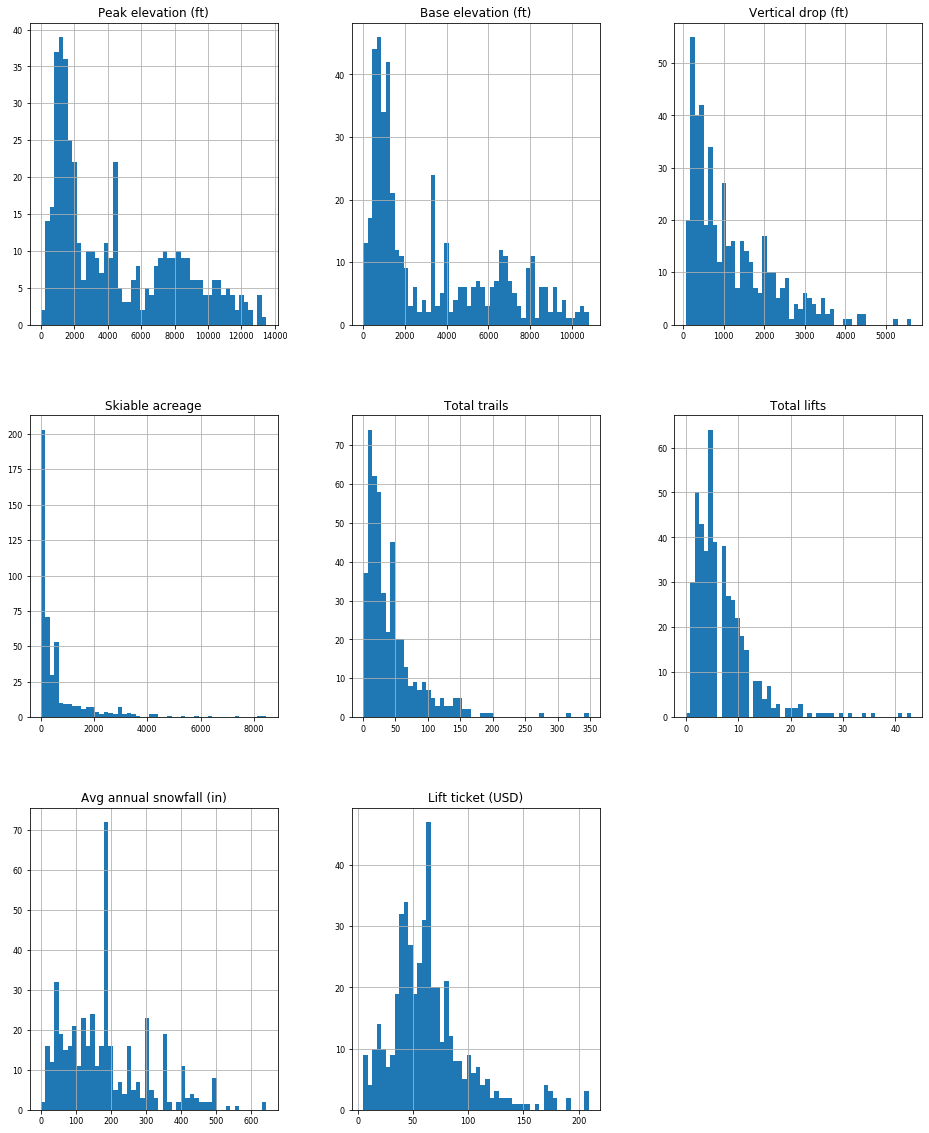

In [19]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [20]:
# Now we will try to find which features are correlated with 'Lift ticket (USD)' 
df_corr = df.corr()['Lift ticket (USD)'][:-1]
corr_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Lift ticket (USD):\n{}".format(len(corr_list), corr_list))

There is 5 strongly correlated values with Lift ticket (USD):
Total trails           0.723576
Total lifts            0.722331
Vertical drop (ft)     0.702719
Skiable acreage        0.551533
Peak elevation (ft)    0.532656
Name: Lift ticket (USD), dtype: float64


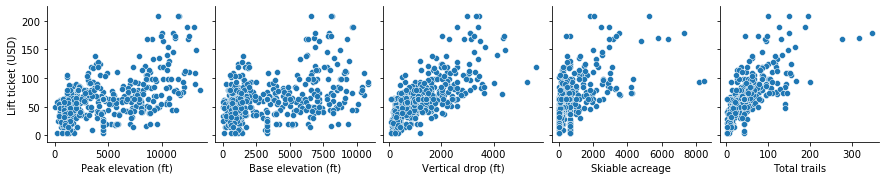

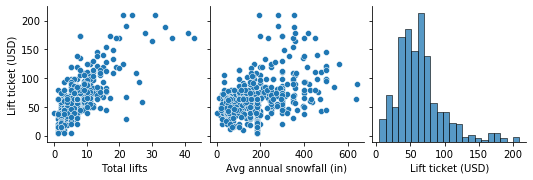

In [21]:
# Scatter plots to show correlations between 'Lift ticket (USD)' and other various metrics
for i in range(3, len(df.columns), 5):
    sns.pairplot(data=df,
                 x_vars=df.columns[i:i+5],
                 y_vars=['Lift ticket (USD)'])

### Through these scatter plots we can see that there is a slight correlation between "Lift ticket (USD)' and many other metrics

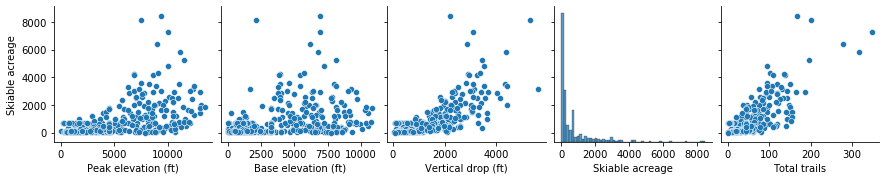

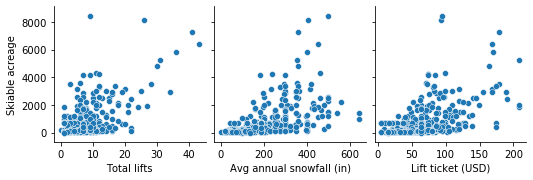

In [22]:
# Scatter plots to show correlation between 'Skiable acreage' and other various metrics
for i in range(3, len(df.columns), 5):
    sns.pairplot(data=df,
                 x_vars=df.columns[i:i+5],
                 y_vars=['Skiable acreage'])

### We can see through the scatter plots that only 'Vertical drop' and 'Total trails' show a slight correlation to 'Skiable acreage' 

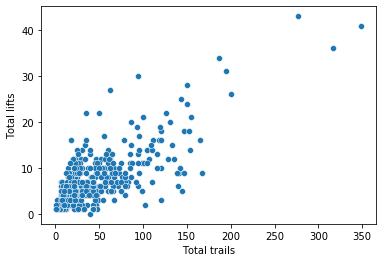

In [23]:
# There is one more scatter plot I want to create to determine if there is any correlation between 'Total trails' and 'Total lifts'
sns.scatterplot(x='Total trails', y='Total lifts', data=df)

### Here we can see a slight corrleation between the two, however most of the data is congested into one area 

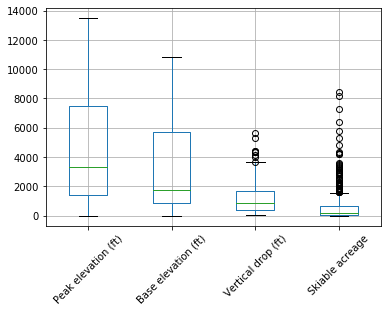

In [24]:
# Various boxplots to identify key statistics and any outliers
boxplot = df.boxplot(column=['Peak elevation (ft)', 'Base elevation (ft)', 'Vertical drop (ft)', 'Skiable acreage'], rot=45)

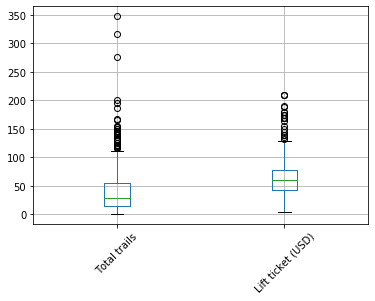

In [25]:
boxplot1 = df.boxplot(column=['Total trails', 'Lift ticket (USD)'], rot=45)

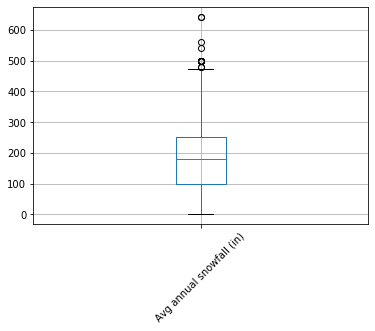

In [26]:
boxplot2 = df.boxplot(column=['Avg annual snowfall (in)'], rot=45)

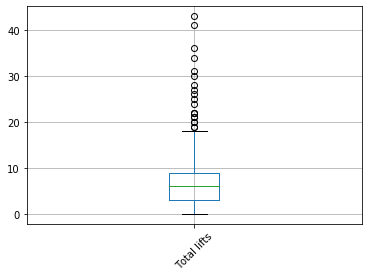

In [27]:
boxplot3 = df.boxplot(column=['Total lifts'], rot=45)

### The boxplots tell us that some of our columns have many outliers however we will simply ignore them because this analysis is being used to identify the best ski resorts in America

In [28]:
# Top 10 Ski Resorts by Average Annual Snowfall (in)
df1 = df.filter(['Avg annual snowfall (in)', 'Resort'], axis=1)
df1 = df1.sort_values(by='Avg annual snowfall (in)', ascending=False)

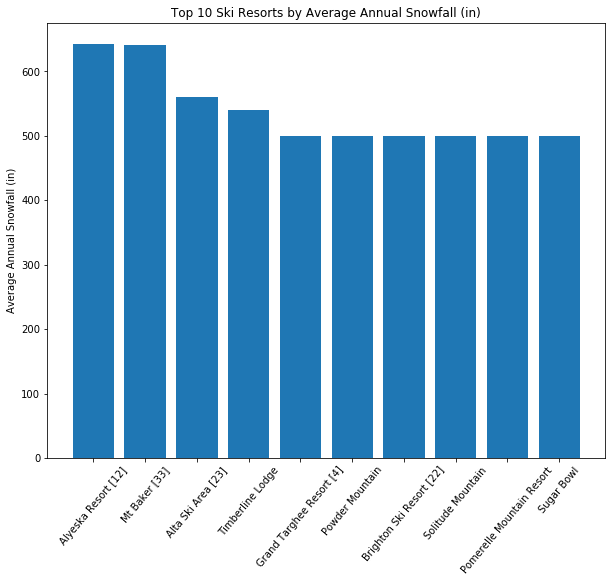

In [29]:
snow = df1['Avg annual snowfall (in)'].head(10)
res = df1['Resort'].head(10)

fig = plt.figure(figsize=(10, 8))

plt.bar(res[0:10], snow[0:10])
plt.xticks(rotation=50)
plt.title('Top 10 Ski Resorts by Average Annual Snowfall (in)')
plt.ylabel('Average Annual Snowfall (in)')
plt.show()

In [30]:
# Exporting data to a CSV 
df.to_csv('ski_resort_analysis.csv', index=False)

# From here I will import the CSV file into Tableau for further analysis utilizing interactive dashboards
# Thank you for following along thus far!